### UCB 1 Exercise

Per lecture 48

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Constants

In [2]:
NUM_TRIALS = 100000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

### Bandit Class

In [3]:
class Bandit():
    def __init__(self, p):
        self.p = p
        self.p_estimate = 0
        self.N = 0
    
    def pull(self):
        return np.random.random() < self.p

    def update(self, x):
        self.N += 1
        self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N

### UCB Function

In [4]:
def ucb(mean_estimate, n, nj):
    return (mean_estimate + np.sqrt(2*np.log(n)/nj))

### Experiment

In [5]:
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    rewards = np.empty(NUM_TRIALS)
    total_plays = 0
    
    # UCB initiatliztion
    for j in range(len(bandits)):
        x = bandits[j].pull()
        total_plays += 1
        bandits[j].update(x)
    
    # Now run trials
    for i in range(NUM_TRIALS):
        j = np.argmax([ucb(b.p_estimate, total_plays, b.N) for b in bandits])
        x = bandits[j].pull()
        total_plays += 1
        bandits[j].update(x)
    
        # For plot
        rewards[i] = x

    cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS)+1)
    
    # Print mean estimates
    for i in bandits:
        print('Bandit mean estimate: {}'.format(i.p_estimate))
    # Plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.xscale('log')
    plt.show()
    

Bandit mean estimate: 0.17910447761194032
Bandit mean estimate: 0.525
Bandit mean estimate: 0.7501707924770876


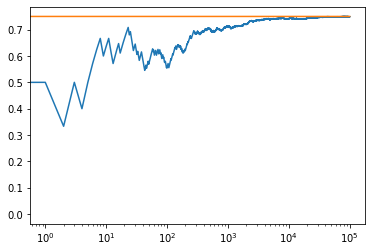

In [6]:
experiment()